# [SOLUCION] Taller de Datos Abiertos

**Nivel : Medio**

Este Jupyter Notebook es para aprender conceptos básicos de la ciencia de datos utilizando la plataforma Datos Abiertos de Cali, Colombia. En este libro aprenderá cómo:
- Recopilar datos de una API
- Datos limpios
- Visualizar y trazar datos
- Crea un visual genial de datos

<hr/>

# 1. Obtener Los Datos


- Queremos este conjunto de datos : [Homicidios comunes en el Municipio de Santiago de Cali](http://datos.cali.gov.co/dataset/homicidios-comunes-en-el-municipio-de-santiago-de-cali-segun-comuna-del-hecho-2001-2017/resource/670f2cd8-3b5f-4657-a136-577afefc38be)

- Podemos usar la **API** para recopilar los datos. El *API Endpoint* es esto:

http://datos.cali.gov.co/en/api/3/action/datastore_search?resource_id=670f2cd8-3b5f-4657-a136-577afefc38be

In [1]:
#Library para usar APIs
import requests
import json
#API Endpoint (de la plataforma de Datos Abiertos)
url = 'http://datos.cali.gov.co/en/api/3/action/datastore_search?resource_id=670f2cd8-3b5f-4657-a136-577afefc38be'

### Usa la API y obtén una respuesta en json
(indicio: mira el documentación de <a href='https://realpython.com/python-requests'>requests</a>)

In [2]:
#usa la api y obtén una respuesta
response = requests.request("GET", url)
#cambiar la respuesta en un objeto json
respjson = response.json()

In [3]:
#mira el objecto json
respjson

{'help': 'http://datos.cali.gov.co/en/api/3/action/help_show?name=datastore_search',
 'result': {'_links': {'next': '/api/3/action/datastore_search?offset=100&resource_id=670f2cd8-3b5f-4657-a136-577afefc38be',
   'start': '/api/3/action/datastore_search?resource_id=670f2cd8-3b5f-4657-a136-577afefc38be'},
  'fields': [{'id': '_id', 'type': 'int'},
   {'id': 'No', 'type': 'text'},
   {'id': '1', 'type': 'text'},
   {'id': '2', 'type': 'text'},
   {'id': '3', 'type': 'text'},
   {'id': '4', 'type': 'text'},
   {'id': '5', 'type': 'text'},
   {'id': '6', 'type': 'text'},
   {'id': '7', 'type': 'text'},
   {'id': '8', 'type': 'text'},
   {'id': '9', 'type': 'numeric'},
   {'id': '10', 'type': 'numeric'},
   {'id': '11', 'type': 'numeric'},
   {'id': '12', 'type': 'numeric'},
   {'id': '13', 'type': 'numeric'},
   {'id': '14', 'type': 'numeric'},
   {'id': '15', 'type': 'numeric'},
   {'id': '16', 'type': 'text'}],
  'include_total': True,
  'records': [{'1': '2001',
    '10': 2010,
    '11'

<hr/>

# 2. Limpiar Los Datos

In [4]:
import pandas as pd

### Crear un DataFrame con el objecto de json y limpialo

- **Usa la <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html'>library para dataframes con pandas</a>**

- En el fin, el DataFrame debería verse así :

In [5]:
#no usa esta csv, es solo para ver cómo deben verse sus datos cuando termine de limpiarlos
pd.read_csv('datosLimpios.csv').head()

,No,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,39,29,46,2,26,27,25,27,46,57,47,42,54,39,26,27
1,2,46,66,57,43,50,51,39,50,49,49,27,37,29,33,26,33
2,3,83,79,83,64,75,54,58,53,65,66,44,43,40,38,41,42
3,4,76,82,76,69,63,74,46,44,73,38,56,44,45,32,34,31
4,5,31,23,45,80,25,27,25,26,27,26,23,39,19,20,19,18


In [6]:
# crear un 'DataFrame' objecto desde el json
# puedes usar json['result']['records'] para ver la información que queremos
data = pd.DataFrame(respjson['result']['records'])
data.head()

,1,10,11,12,13,14,15,16,2,3,4,5,6,7,8,9,No,_id
0,2001,2010,2011,2012,2013,2014,2015,2016,2002,2003,2004,2005,2006,2007,2008,2009,Comuna,1
1,39,57,47,42,54,39,26,27,29,46,2,26,27,25,27,46,1,2
2,2051,1825,1845,1839,1954,1560,1373,1297,2015,2108,2161,1593,1538,1515,1465,1794,TOTAL,3
3,46,49,27,37,29,33,26,33,66,57,43,50,51,39,50,49,2,4
4,83,66,44,43,40,38,41,42,79,83,64,75,54,58,53,65,3,5


### Limpiando los datos, necesitas hacer :
- establece el indice a 'comuna'
- omitir las filas de 'TOTAL' y 'sin especificar'
- cambiar columnas para ser el año
- cambiar el DataFrame para todo ser numérico
- reemplazar los datos faltantes con -1
- ordenar el DataFrame

In [7]:
#LIMPIANDO LOS DATOS
def limpiarLosDatos(datos):
    #establece el indice para ser el numero de comuna
    datos.set_index('No', inplace=True)
    #omitir filas innecesarias
    datosLimpios = datos.loc[["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22"]]
    #omitir columnas innecesarias
    datosLimpios.drop("_id", axis=1, inplace=True)
    #cambiar columnas para ser el año
    datosLimpios.columns = datos.loc['Comuna'][:16]
    #cambiar los valores de columnas para que sean numéricos
    datosLimpios.columns = pd.to_numeric(datosLimpios.columns.values)
    #reemplazar los datos faltantes con -1
    datosLimpios = datosLimpios.replace('-', -1)
    #cambiar los valores para que sean numéricos
    datosLimpios = datosLimpios.apply(pd.to_numeric)
    #ordenar el dataframe por año
    datosLimpios = datosLimpios.sort_index(axis=1)
    return datosLimpios

In [8]:
datosLimpios = limpiarLosDatos(data)
datosLimpios.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
No,,,,,,,,,,,,,,,,
1,39,29,46,2,26,27,25,27,46,57,47,42,54,39,26,27
2,46,66,57,43,50,51,39,50,49,49,27,37,29,33,26,33
3,83,79,83,64,75,54,58,53,65,66,44,43,40,38,41,42
4,76,82,76,69,63,74,46,44,73,38,56,44,45,32,34,31
5,31,23,45,80,25,27,25,26,27,26,23,39,19,20,19,18


<hr/>

# 3. Visualizar los Datos
*(indicio: usa la plot() function para DataFrames en pandas)*

In [9]:
#con esto, podemos visualizar en el Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

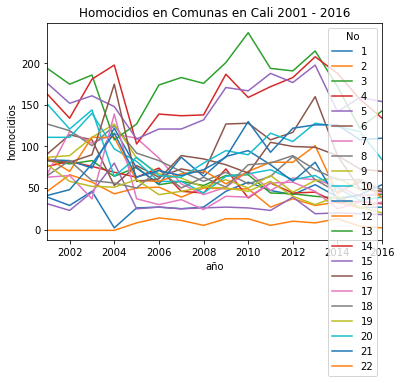

In [10]:
#primero, visualiza todos los datos
datosLimpios.T.plot()
#título y nombres de ejes
plt.title('Homocidios en Comunas en Cali 2001 - 2016')
plt.xlabel('año')
plt.ylabel('homocidios')

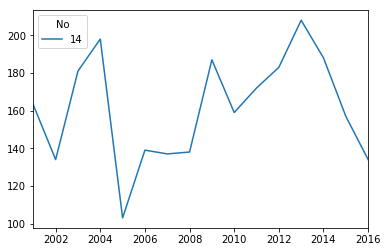

In [11]:
#la comuna con mucho mas homocidios de otros es numero 13, lo visualizamos :
datosLimpios.iloc[[13]].T.plot()

<hr/>

# 4. Mapear los Datos

Para este conjunto de datos, es bueno visualizar los homicidios a lo largo del tiempo, pero es aún más interesante ver dónde están en un mapa. Ahora usaremos la biblioteca de [geopandas](http://geopandas.org/) para crear un mapa de homicidios de Cali.

In [12]:
import geopandas as gpd
caliShapeFileUrl = 'http://ws-idesc.cali.gov.co:8081/geoserver/idesc/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=idesc:mc_comunas&maxFeatures=50&outputFormat=SHAPE-ZIP'

** Usa la función [read_file()](http://geopandas.org/io.html) de geopandas para obtener un geoDataFrame con el shapefile de Cali : **

In [13]:
caliShape = gpd.read_file(caliShapeFileUrl)
caliShape.head()

,comuna,nombre,zona_recol,area,perimetro,geometry
0,21,Comuna 21,EMAS,4828926.999,16149.224,"POLYGON ((1066474.564146134 872996.1840793319,..."
1,15,Comuna 15,EMAS,4060432.724,10425.092,"POLYGON ((1065485.170884323 869864.0966397388,..."
2,20,Comuna 20,CIUDAD LIMPIA,2439498.349,8448.577,"POLYGON ((1058422.146283313 870975.0254123217,..."
3,1,Comuna 1,CIUDAD LIMPIA,3842242.577,15518.149,"POLYGON ((1054966.676632802 874099.4449846093,..."
4,3,Comuna 3,CIUDAD LIMPIA,3704462.889,11003.318,"POLYGON ((1061757.367971685 874615.5337885239,..."


** Usa la función [plot()](http://geopandas.org/gallery/plotting_with_geoplot.html) de geopandas para ver Cali : **

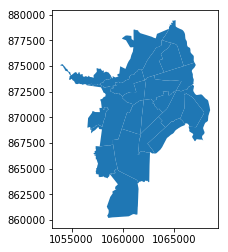

In [14]:
caliShape.plot()

### Siguiente
*Chevre!* Ahora, tenemos un DataFrame con la información de homocidios por comuna por año en Cali, y también tenemos un DataFrame con las formas de las comunas en Cali en una mapa. Unámoslos para hacer una visual interesante!

Vamos a utilizar la función [join()](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.join.html) de pandas para hacer esto.

** Primero: restructura el DataFrame de homocidios para ser compatible con los datos de mapa: **
- Asegúrate de que todos los datos sean numéricos (incluido el índice!)
- Cambie el nombre del índice para ser 'comuna'

In [15]:
#restructura el dataframe para ser compatible con los datos de mapa
datosLimpios.reset_index(inplace=True)
datosLimpios = datosLimpios.apply(pd.to_numeric)
datosLimpios.set_index('No')
datosLimpios.index.names=['comuna']
datosLimpios.head()

,No,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
comuna,,,,,,,,,,,,,,,,,
0,1,39,29,46,2,26,27,25,27,46,57,47,42,54,39,26,27
1,2,46,66,57,43,50,51,39,50,49,49,27,37,29,33,26,33
2,3,83,79,83,64,75,54,58,53,65,66,44,43,40,38,41,42
3,4,76,82,76,69,63,74,46,44,73,38,56,44,45,32,34,31
4,5,31,23,45,80,25,27,25,26,27,26,23,39,19,20,19,18


** Segundo: resetructura el DataFrame de Cali ShapeFile para tener 'comuna' para el índice **

In [16]:
#establecer el índice para ser el número de la comuna
caliShape.set_index('comuna', inplace=True)

** Tercero: Usa la función [join()](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.join.html) de pandas para fusionar los DataFrames **

In [17]:
totalData = caliShape.join(datosLimpios)
totalData.head()

,nombre,zona_recol,area,perimetro,geometry,No,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
comuna,,,,,,,,,,,,,,,,,,,,,
21,Comuna 21,EMAS,4828926.999,16149.224,"POLYGON ((1066474.564146134 872996.1840793319,...",22.0,-1.0,-1.0,-1.0,-1.0,...,11.0,5.0,13.0,13.0,5.0,10.0,8.0,13.0,4.0,2.0
15,Comuna 15,EMAS,4060432.724,10425.092,"POLYGON ((1065485.170884323 869864.0966397388,...",16.0,83.0,81.0,90.0,175.0,...,89.0,85.0,78.0,68.0,105.0,100.0,99.0,89.0,49.0,46.0
20,Comuna 20,CIUDAD LIMPIA,2439498.349,8448.577,"POLYGON ((1058422.146283313 870975.0254123217,...",21.0,41.0,48.0,79.0,116.0,...,65.0,72.0,87.0,130.0,93.0,122.0,126.0,126.0,108.0,110.0
1,Comuna 1,CIUDAD LIMPIA,3842242.577,15518.149,"POLYGON ((1054966.676632802 874099.4449846093,...",2.0,46.0,66.0,57.0,43.0,...,39.0,50.0,49.0,49.0,27.0,37.0,29.0,33.0,26.0,33.0
3,Comuna 3,CIUDAD LIMPIA,3704462.889,11003.318,"POLYGON ((1061757.367971685 874615.5337885239,...",4.0,76.0,82.0,76.0,69.0,...,46.0,44.0,73.0,38.0,56.0,44.0,45.0,32.0,34.0,31.0


In [18]:
#Esta función es para hacer que el mapa se vea bonito
def personalizaLaMapa(vmin, vmax):
    # quitar el eje
    ax.axis('off')

    # título
    ax.set_title('Número de homicidios en 2001 por distrito en Cali', \
                  fontdict={'fontsize': '25',
                            'fontweight' : '3'})

    # fuente de los datos
    ax.annotate('Source: Datos Abiertos, Alcaldía de Cali',
               xy=(0.1, .08), xycoords='figure fraction',
               horizontalalignment='left', verticalalignment='top',
               fontsize=10, color='#555555')

    # Crear una barra de colores como la leyenda del mapa
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

** Trata de usar la función de [plot()](http://geopandas.org/gallery/plotting_with_geoplot.html) en geopandas para visualiza todos en el mapa de Cali : **
- primero, solo por un año
- usa la función 'personalizaLaMapa' para hacer que el mapa se vea bonito
- despues, guarda la figure en una imagen de png con la función [savefig()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)

/Applications/anaconda/lib/python3.6/site-packages/geopandas/plotting.py:92: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None in values:
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


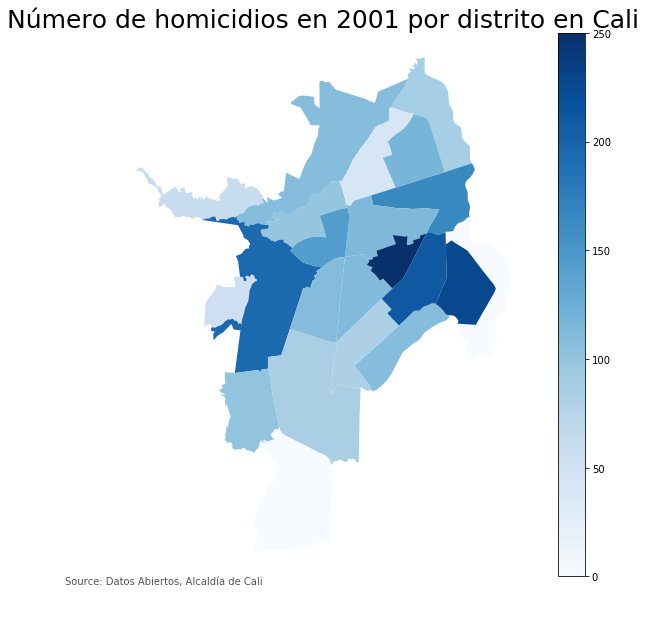

In [19]:
#el año (year) que queremos ver
year = 2001
vmin, vmax = 0, 250

#crear una figura en matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))
totalData.plot(column=year, cmap='Blues', ax=ax)

# Personalización

personalizaLaMapa(vmin, vmax)

# esto guardará la figura como un png de alta resolución. También puede guardar como svg
fig.savefig('mapadehomocidios.png', dpi=300)

# Buen Trabajo!

Muy genial! Utilizamos datos de la plataforma de [Datos Abiertos, Cali](http://datos.cali.gov.co/) y creamos nuestro propio visual! ¿Qué otros conjuntos de datos geniales podemos utilizar?

![Homocidios](https://media.giphy.com/media/fSRR6jTOJggap5KGS9/giphy.gif "homocidios")

<hr/>

## Fin.

<hr/>